In [340]:
# First import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [341]:
# import dataset
df = pd.read_csv('wineqty.csv')

# Check first few rows of dataset
df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [342]:
# Drop ID variable

df.drop("Id",axis=1,inplace=True)

In [343]:
# view summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [344]:
# drop duplicates

df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [345]:
# Check first 5 rows of dataset

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [346]:
# check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [347]:
# look at descriptive statistics

df.describe(include='all')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_11136\220074859.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'])


<Axes: xlabel='quality', ylabel='Density'>

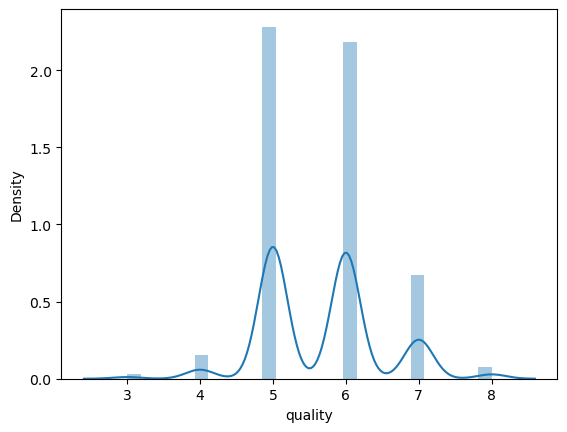

In [373]:
# Distribution of Quality

sns.distplot(df['quality'])

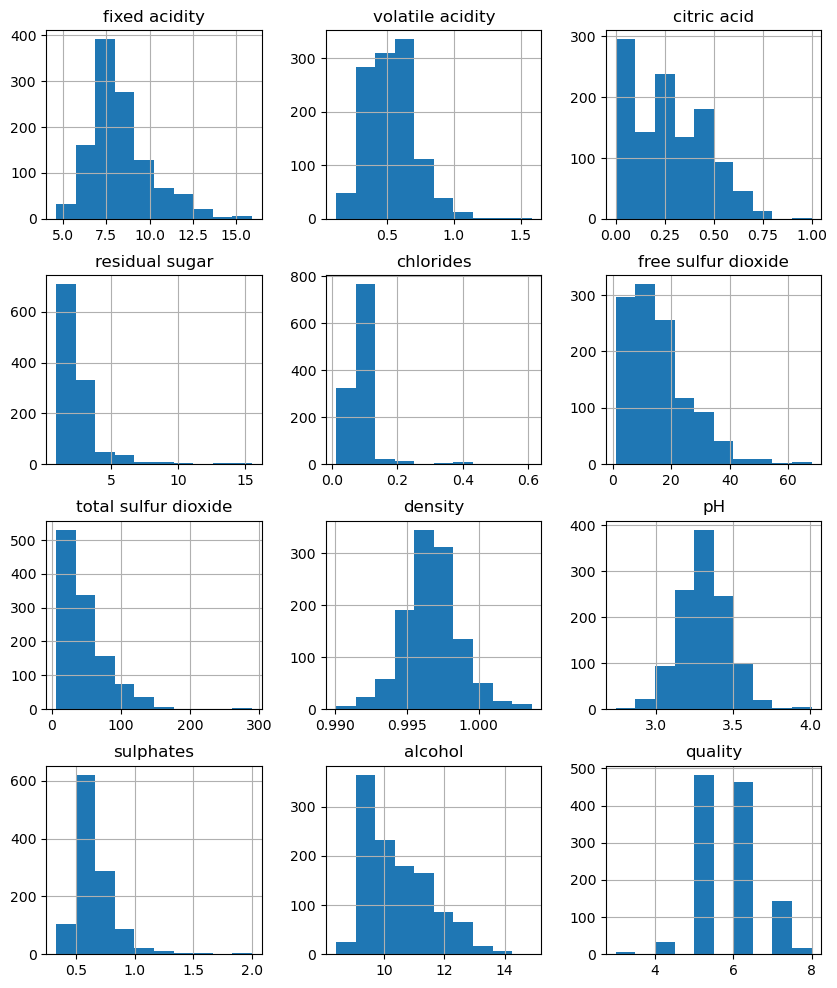

In [368]:
df.hist(figsize=(10,12))
plt.show()

In [350]:
# Now validate Regression assumptions

# import dependent variable Quality to test for Normality
df_norm = pd.read_csv('Quality.csv')

# Check first 5 rows of dataset
df_norm.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [351]:
# Shapiro Wilk Test of Normality

# Null hypothesis = Quality is Normally distributed
# Alternative hypothesis= Quality is not Normally distributed

shapiro(df_norm)

# Since the p-value of Quality is > 0.05 we fail to reject H0 and conclude that Quality follows the Normal distribution


# NORMALITY TEST SATISTIED

ShapiroResult(statistic=0.8547005653381348, pvalue=3.61023655476521e-31)

In [352]:
# Explanatory Variables

x = df[['fixed acidity','volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [353]:
# Dependent Variable

y = df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [354]:
# Add a constant to the model

x=sm.add_constant(x)

In [355]:
# Create a Multiple Linear Regression Model

model = sm.OLS(y,x)

In [356]:
# Fit a Multiple Linear Regression Model

results = model.fit()

In [357]:
# Summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     61.49
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.26e-107
Time:                        13:24:40   Log-Likelihood:                -1106.7
No. Observations:                1143   AIC:                             2237.
Df Residuals:                    1131   BIC:                             2298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.5495     24.773      0.870      0.385     -27.057      70.156
fixed acidity            0.0230      0.030      0.759      0.448      -0.036       0.082
volatile acidity        -1.1291      0.141     -8.023      0.000      -1.405      -0.853
citric acid             -0.1319      0.173     -0.762      0.446      -0.471       0.208
residual sugar           0.0135      0.018      0.732      0.464      -0.023       0.050
chlorides               -1.7082      0.497     -3.434      0.001      -2.684      -0.732
free sulfur dioxide      0.0024      0.003      0.928      0.354      -0.003       0.007
total sulfur dioxide    -0.0028      0.001     -3.321      0.001      -0.004      -0.001
density                -17.4493     25.286     -0.690      0.490     -67.062      32.163
pH                      -0.4082      0.223     -1.832      0.067      -0.845       0.029
sulphates                0.8752      0.134      6.555      0.000       0.613       1.137
alcohol                  0.2801      0.031      8.963      0.000       0.219       0.341
==============================================================================
Omnibus:                       19.010   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.205
Skew:                          -0.141   Prob(JB):                     4.55e-07
Kurtosis:                       3.731   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [358]:
# Durbin Watson Test of Independence

durbin_watson(results.resid)

# Since the DW test value is within the range of 0 to 2 it confirms the presence of autocorrelation. 


# TEST OF INDEPENDENCE NOT SATISFIED

1.779910182052652

In [372]:
# Bruesch Pagan Test
# To check for constant variance

# H0 = Homoscedasticity is present
#vH1 = Heteroscedasticity is [resent]

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(names,test)

# Since p-value < 0.05 we fail to accept the H0 and conclude that the model is heteroscedastic.

# HOMOSCEDASTICITY ASSUMPTION NOT SATISFIED

[('Lagrange multiplier statistic', 60.427284439269215),
 ('p-value', 7.722669581927686e-09),
 ('f-value', 5.739128124098029),
 ('f p-value', 4.523229185467221e-09)]

In [86]:
# Multicollinearity
#To check the strength of relationship among explanatory variables.
df.corr()

# No extreme correlation cases between independent variables hence Multicollinerity do not exist.

# MULTICOLLINEARITY TEST SATISFIED

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [94]:
# The dataset satisfied 2 out of 4 Regression assumptions.